# Introduction

This project will investigate relationships between data about different countries' life expectancy and GDP. The goals are to prepare data, followed by analysis with plots, and seek to explain the findings from the study.

Before we start comparing variables, let's examine our data!

**Data sources**

- Project prompt and CSV file: [Codecademy](https://www.codecademy.com/) Data Analyst course

- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)

### Import Python modules

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

### Load and examine the data

We'll read the CSV file into a Pandas dataframe, then print the first few lines to get an idea of what the dataset looks like.

In [4]:
df = pd.read_csv('all_data.csv')
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


### Rename Columns

Let's rename the column "Life expectancy at birth (years)" to an abbreviation that is more managable. Calling `df.head()` again should reflect this change.

In [5]:
df.rename(columns = {'Life expectancy at birth (years)':'LEABY'}, inplace = True)
df.head()

,Country,Year,LEABY,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


### Find unique country names

What are the countries included in the study?

In [6]:
print(df.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


### Rename variables

Let's also rename 'United States of America' to 'US' for the sake of brevity

In [7]:
df = df.replace('United States of America', 'US')
print(df.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'US' 'Zimbabwe']


### Find unique years

What are the years that a sample was taken?

In [8]:
print(df.Year.unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


# Graph the Data

Now that we've examined our dataset, it looks like our main variables are:

+ Country
+ Year
+ LEABY: Life expectancy at birth (years)
+ GDP

As an initial question, let's examine the relationship between GDP and LEABY, and group by Country. Then, we can find averages for GDP and LEABY for each country. Finally, we will examine changes for those variables across every recorded year (2000 - 2015).

### GDP vs Life Expectancy

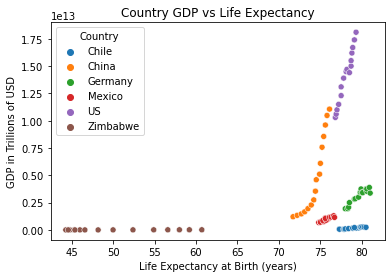

In [9]:
sns.scatterplot(data=df, x='LEABY', y='GDP', hue='Country')
plt.xlabel('Life Expectancy at Birth (years)')
plt.ylabel('GDP in Trillions of USD')
plt.title('Country GDP vs Life Expectancy')
plt.show()

We can see that China, the US, and Zimbabwe are spaced quite far apart from the rest of our countries. To make viewing easier, let's examine an individual scatter plot for each country.

### Plotting GDP vs Life Expectancy for Individual Countries

At a glance, we can see that GDP and life expectancy are correlated for each country in our dataset. However, when we plot each country seperately, the y-axis is no longer scaled to trillions of USD for every country, but rather on an easily viewable scale. While the graphs above make viewing correlation easy, the adjusted axis values make it difficult to easily compare values.

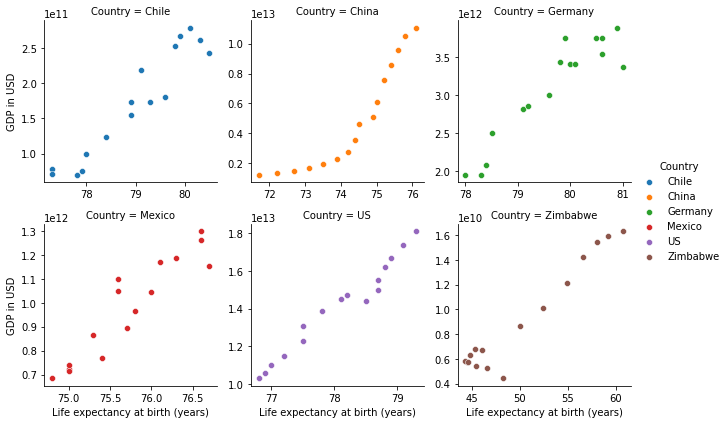

In [25]:
graph = sns.FacetGrid(data=df, col='Country', col_wrap=3, hue = 'Country', sharey = False, sharex = False)
graph = (graph.map(sns.scatterplot,'LEABY', 'GDP')
         .add_legend()
         .set_axis_labels('Life expectancy at birth (years)', 'GDP in USD'))

### Creating a new dataframe with averages

One way to make understanding the scale for each ocountry easier is to average GDP and life expectancy across all years. To do this, we need to make a seperate dataframe that groups by country and takes the averages for each country.

In [37]:
df_avg = df.drop('Year', axis = 1).groupby('Country').mean().reset_index()
df_avg

,Country,LEABY,GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,US,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


### Average GDP and Life Expectancy (2000 - 2015)

Now that we have a new dataframe that contains average GDP and LEABY, we can view that data with barplots.

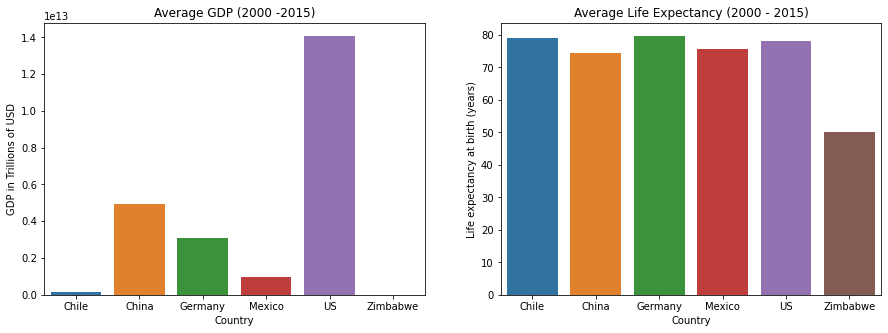

In [35]:
fig, axes = plt.subplots(1,2, figsize=(15,5))

axes[0] = sns.barplot(ax=axes[0], data=df_avg, x='Country', y='GDP')
axes[0].set_ylabel('GDP in Trillions of USD')
axes[0].set_title('Average GDP (2000 - 2015)')


axes[1] = sns.barplot(ax=axes[1], data=df_avg, x='Country', y='LEABY')
axes[1].set_ylabel('Life expectancy at birth (years)')
axes[1].set_title('Average Life Expectancy (2000 - 2015)')

plt.show()

### GDP and Life Expectancy over time

Finally, let's examine the changes in GDP and LEABY over time.

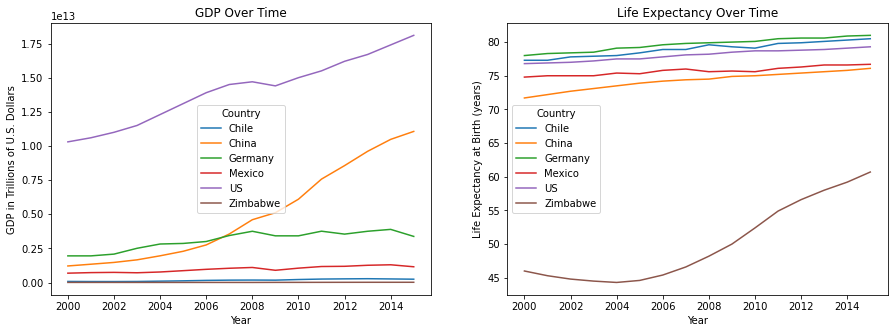

In [36]:
fig, axes = plt.subplots(1,2, figsize=(15,5))

axes[0] = sns.lineplot(ax=axes[0], x=df.Year, y=df.GDP, hue=df.Country)
axes[0].set_ylabel('GDP in Trillions of U.S. Dollars')
axes[0].set_title('GDP Over Time')

axes[1] = sns.lineplot(ax=axes[1], x=df.Year, y=df.LEABY, hue=df.Country)
axes[1].set_ylabel('Life Expectancy at Birth (years)')
axes[1].set_title('Life Expectancy Over Time')

plt.show()

# Conclusion

We've seen that all six countires have increased their life expectancy and GDP since 2000. However, Zimbabwe stands out for its drastic increase in life expectancy, while China and the US stand out for increases in GDP. When we graphed average GDP, the US had such a large value that other countries like Zimbabwe and Chile hardly registered visibly on the plot.

Despite enormous GDP values from the US, other countries like Chile and Germany still had higher life expectancies. This could prompt questions for futher research. Do GDP increases only relate to large life expectancy increases in lower-GDP countries like Zimbabwe? Or does Chile's high life expectancy but still lower-GDP negate the idea?